<a href="https://colab.research.google.com/github/wonjae124/2021_Lab_project/blob/main/(End_02_18%5D_cifar10_tutorial_DAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/model
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/model
/content/drive/MyDrive/model


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr #use of numpy
import pytorch_ssim
import math
import cv2



In [3]:
def Get_psnr(input, output, max_val=1.0):
    """
    Remark
    
    input type : tensor
    output type : float
    """
    input = input.cpu().detach().numpy()
    output = output.cpu().detach().numpy()

    b = input[:,:,0]
    g = input[:,:,1]
    r = input[:,:,2]

    hat_b = output[:,:,0]
    hat_g = output[:,:,1]
    hat_r = output[:,:,2]

    b_img_diff = hat_b - b
    g_img_diff = hat_g - g 
    r_img_diff = hat_r - r
    
    b_mse = np.mean(b_img_diff**2)
    g_mse = np.mean(g_img_diff**2)
    r_mse = np.mean(r_img_diff**2)

    total_mse = r_mse + g_mse + b_mse
    

    if total_mse == 0:
      return 100
    else:
      psnr = 10 * math.log10( (max_val**2)/total_mse)
      return psnr 

In [4]:
# 훈련 데이터, 검증 데이터, 테스트 데이터순으로 5000개, 10000개, 10000개
tr_dataset = datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor()) 
tr_subset, val_subset = torch.utils.data.random_split(tr_dataset, [40000,10000], generator=torch.Generator().manual_seed(1))
test_set  = datasets.CIFAR10(root='./data', train=False, download=True,transform=transforms.ToTensor())

tr_loader = DataLoader(tr_subset, batch_size = 32)
val_loader = DataLoader(val_subset, batch_size = 32)


Files already downloaded and verified
Files already downloaded and verified


In [5]:
print(tr_subset[2][1])

6


In [6]:
X_train_set = tr_subset.dataset.data[tr_subset.indices]
tr_subset.dataset.targets = torch.tensor(tr_subset.dataset.targets)

X_val_set = val_subset.dataset.data[val_subset.indices]
val_subset.dataset.targets = torch.tensor(val_subset.dataset.targets)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [7]:
X_train_set = torch.tensor(X_train_set)
Y_train_set = tr_subset.dataset.targets[tr_subset.indices]

X_val_set = torch.tensor(X_val_set)
Y_val_set =val_subset.dataset.targets[val_subset.indices]


In [8]:
train_set_arr = X_train_set.numpy() #numpy 자료형(ndarray) 변환
val_set_arr = X_val_set.numpy()


In [9]:
train_set_arr.shape

(40000, 32, 32, 3)

In [10]:
Gaussian_blur_weak_tr_dataset = []
Gaussian_blur_weak_val_dataset = []

for i in range(40000):
  Gaussian_blur_weak_tr_dataset.append( [torch.from_numpy(cv2.GaussianBlur(train_set_arr[i], (3,3),0).transpose(2,0,1)).float().div(255.0), Y_train_set[i] ])
#append는 하나의 argument만 수용하므로 대괄호로 묶어줘야 한다.
for i in range(10000):
  Gaussian_blur_weak_val_dataset.append( [torch.from_numpy(cv2.GaussianBlur(val_set_arr[i],(3,3),0).transpose(2,0,1)).float().div(255.0), Y_val_set[i] ] )




hat_tr_dataloader = DataLoader(Gaussian_blur_weak_tr_dataset, batch_size = 32)
hat_val_dataloader = DataLoader(Gaussian_blur_weak_val_dataset, batch_size = 32)

print(len(hat_tr_dataloader))

#Utility functions to un-normalize and display an image
def imshow(img):

    plt.imshow(np.transpose(img, (1, 2, 0)), interpolation= 'nearest') 


#Define the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



1250


In [11]:
print(torch.from_numpy(cv2.GaussianBlur(train_set_arr[i], (3,3),0).transpose(2,0,1)).shape)

torch.Size([3, 32, 32])




```

print(len(dataloader))
it = iter(dataloader)
img, label = it.next()
plt.imshow(img[0])
print()

print('img_shape',img.shape)


Gaussian_blur_weak_dataset = torch.from_numpy(Gaussian_blur_weak_tr_arr).float().div(255.0) 


print(Gaussian_blur_weak_tr_arr)

print(Gaussian_blur_weak_tr_tensor.shape)

print(Y_train_set.shape)

for i in range(len(train_set_arr)):
  Gaussian_blur_weak_tr_merged.append([Gaussian_blur_weak_tr_tensor[i],Y_train_set[i]])





for i in range(len(test_set_arr)):
  Gaussian_blur_weak_test_arr.append(cv2.GaussianBlur(test_set_arr[i],(3,3),0))

Gaussian_blur_weak_test_tensor = torch.from_numpy(Gaussian_blur_weak_test_arr).float().div(255.0).unsqueeze(1)

#for i in range(len(train_set_arr)):

for i in range(len(test_set_arr)):
  Gaussian_blur_weak_test_merged.append(Gaussian_blur_weak_test_tensor[i],Y_val_set[i])```



print(torch.from_numpy(cv2.GaussianBlur(train_set_arr[i],(3,3),0).transpose(1,0,2)).float().div(255.0).shape)

Gaussian_blur_weak_tr_arr = np.array([])
y = np.array([])
GS = cv2.GaussianBlur(train_set_arr[1],(3,3),0)
Gaussian_blur_weak_tr_arr = np.append(Gaussian_blur_weak_tr_arr,GS)
print(y.shape)
print(Gaussian_blur_weak_tr_arr.shape)

print(type(GS))

print(Gaussian_blur_weak_tr_arr.shape)

type(Gaussian_blur_weak_tr_arr)

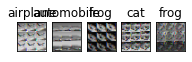

In [12]:
dataiter = iter(tr_loader)

images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

#Plot the images
fig = plt.figure(figsize=(3,3))
# display 20 images
for idx in np.arange(5):
    ax = plt.subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(images[idx].reshape(32,32,3))
    ax.set_title(classes[labels[idx]])

In [13]:
class DenosingAutoencoder(nn.Module):
  def __init__(self):
    super(DenosingAutoencoder, self).__init__()
    #input = 3 by 32 by 32
    self.encoder = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, stride = 2, padding=0),
    #1nd layer_size = 8 by 15 by 15
        nn.ReLU(True),

        nn.Conv2d(in_channels =8, out_channels = 16, kernel_size = 3, stride = 2, padding = 0),
    #2nd leyar_size = 16 by 7 by 7   
        nn.ReLU(True),

        nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 2, padding = 0),
    #3nd layer_size = 32 by 3 by 3
        nn.ReLU(True),
    #   nn.Flatten(),
    #5nd layer (32, 32, 3, 3) -> (32, 32*3*3) 
    #   nn.Linear(32*3*3,10),
    #6nd layer (32, 32*3*3) -> (32, 10)
    #   nn.ReLU(True))
    )
    self.decoder = nn.Sequential(
    #   nn.Linear(10, 32*3*3),
    #    nn.ReLU(True),
    #1nd layer (32,10) -> (32,32*3*3)
    #    nn.Unflatten(1,(32,3,3)),
    #2nd layer (32, 32*3*3) -> (32, 32, 3, 3)
        nn.ConvTranspose2d(in_channels = 32, out_channels = 16, kernel_size = 3, stride = 2, padding =0),
        nn.ReLU(True),
    #3nd layer (batch_size, 16, 7, 7)
        nn.ConvTranspose2d(in_channels = 16, out_channels = 8, kernel_size = 3, stride = 2, padding = 0),
        nn.ReLU(True),
    #4nd layer (batch_size, 8, 15, 15)
        nn.ConvTranspose2d(in_channels = 8, out_channels = 3, kernel_size = 3, stride = 2, padding = 0, output_padding = 1),
    #5nd layer(batch_size, 3, 32, 32)
        nn.Sigmoid())
  
  def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [14]:
#Instantiate the model
model = DenosingAutoencoder()
print(model)

DenosingAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(2, 2), output_padding=(1, 1))
    (5): Sigmoid()
  )
)


In [15]:
#Loss function
criterion = nn.MSELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def get_device():
    if torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

cuda


DenosingAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(2, 2), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

Epoch: 1 	Training Loss: 0.706049	 validation Loss 0.000797
Class:deer 	 PNSR :15.840609761242266
Class:cat 	 PNSR :20.235956570869554
Class:deer 	 PNSR :13.362859325423875
Class:frog 	 PNSR :9.506981892977084
Class:horse 	 PNSR :12.013139681080947


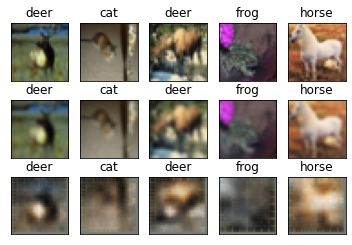

Epoch: 2 	Training Loss: 0.485568	 validation Loss 0.000700
Class:deer 	 PNSR :16.236252461514034
Class:cat 	 PNSR :20.680279055786215
Class:deer 	 PNSR :13.270348796714664
Class:frog 	 PNSR :9.75143683263499
Class:horse 	 PNSR :12.498846465652854


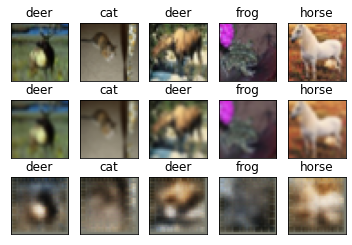

Epoch: 3 	Training Loss: 0.431733	 validation Loss 0.000640
Class:deer 	 PNSR :16.985614506542746
Class:cat 	 PNSR :21.08466686145765
Class:deer 	 PNSR :14.302827406965267
Class:frog 	 PNSR :9.824797583274517
Class:horse 	 PNSR :12.635948103367866


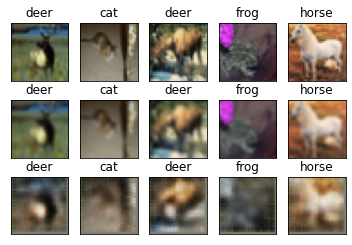

Epoch: 4 	Training Loss: 0.400456	 validation Loss 0.000603
Class:deer 	 PNSR :17.33718220298904
Class:cat 	 PNSR :21.512964436836292
Class:deer 	 PNSR :15.154104409805022
Class:frog 	 PNSR :9.965024568472266
Class:horse 	 PNSR :12.777576099351753


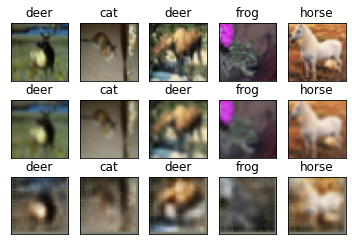

Epoch: 5 	Training Loss: 0.380696	 validation Loss 0.000577
Class:deer 	 PNSR :17.669571817223797
Class:cat 	 PNSR :21.535223610284625
Class:deer 	 PNSR :15.506995220409074
Class:frog 	 PNSR :10.036356777139765
Class:horse 	 PNSR :12.996719688155565


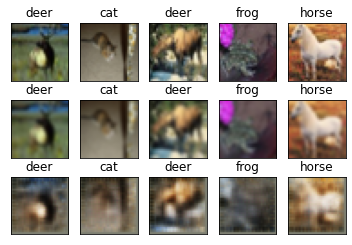

KeyboardInterrupt: ignored

In [16]:
#Epochs
n_epochs = 500
train_loss_graph = np.array([])
val_loss_graph = np.array([])

for epoch in range(1, n_epochs+1):
    model.train()
    # monitor training loss
    train_loss = 0.0
    val_loss = 0.0
    #Training
    for i, (input,hat_input) in enumerate(zip(tr_loader,hat_tr_dataloader)):
        images, _ = input
        hat_images, _ = hat_input
        images = images.to(device)
        hat_images = hat_images.to(device)        
        optimizer.zero_grad()
 #      print(hat_images.shape)
        outputs = model(hat_images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)

    train_loss = train_loss/len(tr_loader)
    train_loss_graph = np.append(train_loss_graph, train_loss)   
    
    if (epoch+1)%20 == 0:
          model.eval()
          for i, (input,hat_input) in enumerate(zip(val_loader,hat_val_dataloader)):
              images, labels = input
              hat_images,_ = hat_input
              images = images.to(device)
              hat_images = hat_images.to(device)
              outputs = model(hat_images)
              val_loss = criterion(outputs, images)
              val_loss += val_loss.item()*images.size(0)      
          val_loss = val_loss/len(val_loader)
          val_loss_graph = np.append(val_loss_graph, val_loss.cpu().detach().numpy())
          print('Epoch: {} \tTraining Loss: {:.6f}\t validation Loss {:.6f}'.format(epoch, train_loss, val_loss))
          
          for j in range(5):

            val_psnr = Get_psnr(images[j], outputs[j], max_val = 1.0)
            print(f'Class:{classes[labels[j]]} \t PNSR :{val_psnr}')
            
            ax = plt.subplot(3,5,j+1)
            plt.imshow(images[j].cpu().numpy().transpose(1, 2, 0))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title(classes[labels[j]])

            ax = plt.subplot(3,5,j+5+1)
            plt.imshow(hat_images[j].cpu().numpy().transpose(1, 2, 0))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title(classes[labels[j]])

            ax = plt.subplot(3, 5, j+5+5+1)
            plt.imshow(outputs[j].cpu().detach().numpy().transpose(1, 2, 0))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title(classes[labels[j]])
          plt.show()

          

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_loss_graph,'r-*')
plt.plot(val_loss_graph, 'b-*')
plt.legend(['train_loss_graph','val_loss_graph'])
plt.title("CIFAR1 0")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()



In [ ]:
print(images.size(0))

In [ ]:
#Batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

#Sample outputs
images = images.to(device)
print('입력 이미지 크기',images.shape)

output = model(images)
print('출력 이미지 크기',output.shape)

images_np = images.cpu().numpy() #입력값은 그래디언 계산이 안 되었으므로(model 안 거침) detach가 필요 없다.
batch_size = 32
output=output.to(device)
output_np = output.detach().cpu().numpy()

#Original Image(5):
for idx in np.arange(5):
    val_ssim_scikit =  ssim((images_np[idx], output_np[idx], data_range = 1.0,multichannel = True)           

    PSNR_custom = Get_psnr(images[idx], output[idx], max_val = 1.0)
    PSNR_scikit = psnr(images_np[idx], output_np[idx], data_range = 1.0)
#    SSIM = pytorch_ssim(images[idx],output[idx]).data
#    SSIM = ssim(images[idx], output[idx], data_range = 1.0, multichannel =True)
    print(f'Class {classes[labels[idx]]} Scikit_PSNR {PSNR_scikit} / Custom_PSNR {PSNR_custom}')
#   print(SSIM)
    print("SSIM : {.3f}", val_ssim_scikit)
    ax = plt.subplot(2, 5, idx+1, xticks=[], yticks=[])
    imshow(images[idx].cpu())
    ax.set_title(classes[labels[idx]])

    ax = plt.subplot(2, 5, idx+1+5, xticks=[], yticks=[])
    imshow(output[idx].detach().cpu().numpy())
    ax.set_title(classes[labels[idx]])
plt.show() 

In [ ]:
plt.imshow(train_set_arr[0])
print(train_set_arr[1].shape)

(B, G, R) = cv2.split(train_set_arr[0])

plt.imshow(B)

criterion = nn.MSELoss()


Mse1 = criterion(model(B).transpose(1,2,0),B)
Mse2 = criterion(model(G),G)
Mse3 = criterion(model(R),R)



Total_Mse = Mse1+Mse2+Mse3

